In [1]:
%matplotlib inline
import sys,os,getopt,argparse,math
import numpy as np
import matplotlib.pyplot as plt


First read in the file and create data as numpy 1Darray of times  

In [2]:
mavSerialList=[]
with open('maverick_serial') as f:
    for line in f:
      mavSerialList.append(float(line.split()[1]))
mavSerialArray=np.asarray(mavSerialList)

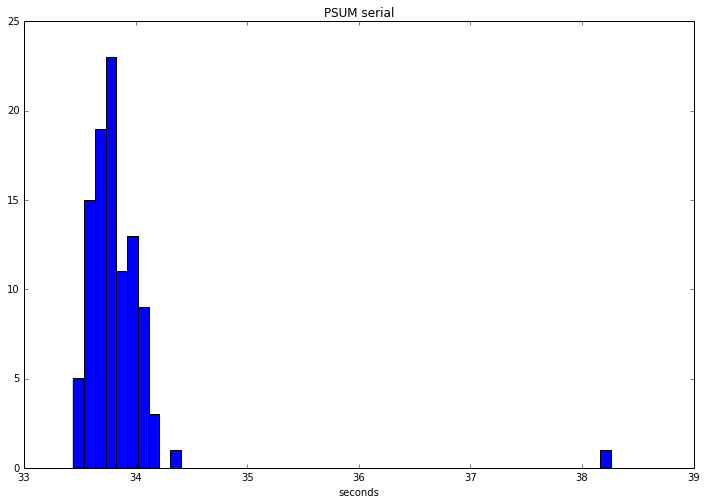

In [3]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(mavSerialArray,50)
plt.xlabel('seconds')
plt.title('PSUM serial')
plt.show()


In [4]:
#fastOpenMP1_data=np.array(filter(lambda x: x <= 42., dataArray))

In [5]:
print 'PSUM serial average is' ,np.average(mavSerialArray)
print 'PSUM serial standard deviation is',np.std(mavSerialArray)

PSUM serial average is 33.84031
PSUM serial standard deviation is 0.481275507688


In [16]:
testList=['serial','openmp','openmp-2','tbb_rankBuffer','tbb_singleBuffer']
threadCount=[1,2,4,8,10,12,14,16,18,19,20,25,30,35,40]


In [19]:
dataListDict={}
dataArrayDict={}
for test in testList[1:3]:
    for thread in threadCount:
        listPre='maverick_' + test + '_' + str(thread) 
        dataFileName=listPre + '.txt'
        listName=listPre
        dataListDict[listName]=[]
        with open(dataFileName) as f:
          for line in f:
            #print line
            dataListDict[listName].append(float(line.split()[2]))
for key in dataListDict:
    dataArrayDict[key]=np.asanyarray(dataListDict[key])

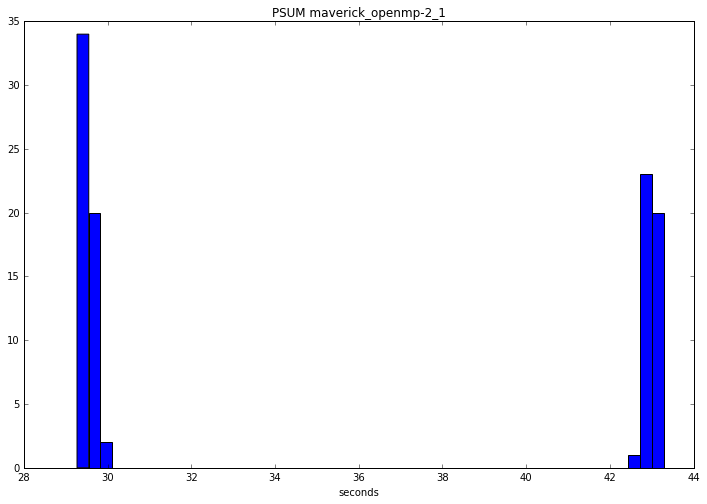

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='maverick_openmp-2_1'
ax.hist(dataArrayDict[dk],50)
plt.xlabel('seconds')
plt.title('PSUM '+ dk)
plt.show()

In [46]:
openMpVal=[]
openMpTcount=[]
openMp2Val=[]
openMp2Tcount=[]
for key in dataArrayDict:
    if key.split("_")[1]=='openmp':
        openMpVal.append(np.average(dataArrayDict[key]))
        openMpTcount.append(key.split("_")[-1])
    if key.split("_")[1]=='openmp-2':
      openMp2Val.append(np.average(dataArrayDict[key]))
      openMp2Tcount.append(key.split("_")[-1])

KeyError: 'Find the fastest'

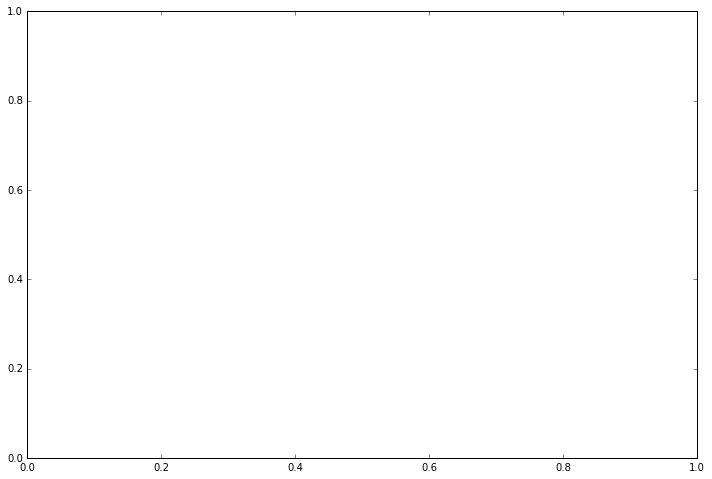

In [51]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Find the fastest'
ax.hist(dataArrayDict[dk],50)
ax.loglog(openMpTcount,openMpVal,'+')
ax.loglog(openMp2Tcount,openMp2Val,'o')
plt.xlabel('Thread coutn')
plt.title('PSUM: '+ dk)
plt.show()


In [40]:
openMpTcount

['30',
 '35',
 '4',
 '1',
 '2',
 '8',
 '18',
 '19',
 '16',
 '14',
 '12',
 '10',
 '25',
 '20',
 '40']